In [8]:
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import sys

In [9]:
print(sys.path[0])
img = Image.open("../data/images/mitosis_img_005.jpg").convert("L")


/home/junkai/build-your-nn/src/ipynb


In [3]:
img.size

(3024, 4032)

In [4]:
a = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
convert_tensor = transforms.ToTensor()
t_img = convert_tensor(img).to(device)
print(t_img.shape)
t_images = torch.empty((0, a, a)).to(device)
for i in tqdm(range(-a)):
    for k in (range(320-a)):
        temp = transforms.functional.crop(t_img, k, i, a, a)
        t_images = torch.cat((t_images, temp), axis = 0)

torch.Size([1, 4032, 3024])


0it [00:00, ?it/s]


In [5]:
plt.imshow(t_images[0].cpu(), cmap='gray')

IndexError: index 0 is out of bounds for dimension 0 with size 0

In [ ]:
print(t_images.shape)
train_set = []
for i in tqdm(t_images.to("cpu")):
    train_set.append((i,1))
print(train_set[0])
data_loader = torch.utils.data.DataLoader(train_set, batch_size=5, shuffle=True)


In [ ]:
for k, (x, y) in enumerate(data_loader):
    print(y.shape)
    break
print(y[3])

torch.Size([1, 1040, 788])


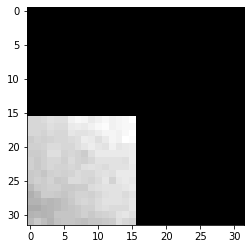

In [3]:
import torch.nn.functional as F
import sys
sys.path.append('../')
from py.mylib import *

t_img = importPicture("..\data\images\mitosis_img_005.jpg")
print(t_img.shape)
plt.imshow(transforms.functional.crop(t_img, 0, 756, 32, 32)[0], cmap='gray')

In [41]:
size = 32
t_images = torch.empty(1008*756, 32, 32)
for i in tqdm(range(t_img.shape[1]-size)):
    for k in (range(t_img.shape[2]-size)):
        t_images[k + 756 * i] = transforms.functional.crop(t_img, i, k, size, size)

100%|██████████| 1008/1008 [00:07<00:00, 126.16it/s]


torch.Size([762048, 32, 32])
762048


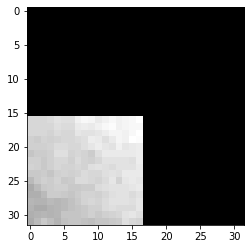

In [43]:
print(t_images.shape)
print(len(t_images))
a = 755
plt.imshow(t_images[a], cmap='gray')


ValueError: only one element tensors can be converted to Python scalars

In [38]:
temp = torch.empty(1008*756, 32, 32)
for i, t in enumerate(tqdm(t_images)):
    temp[i] = t_images[i]
#print(temp.shape)

100%|██████████| 762048/762048 [00:03<00:00, 231695.97it/s]


In [40]:
temp.shape

torch.Size([762048, 32, 32])